In [41]:
!pip3 uninstall -y opencv-contrib-python 
!pip3 uninstall -y opencv-python

!pip3 install opencv-contrib-python
!pip3 install opencv-python

Found existing installation: opencv-contrib-python 4.5.5.64
Uninstalling opencv-contrib-python-4.5.5.64:
  Successfully uninstalled opencv-contrib-python-4.5.5.64
Found existing installation: opencv-python 4.5.5.64
Uninstalling opencv-python-4.5.5.64:
  Successfully uninstalled opencv-python-4.5.5.64
  Using cached opencv_contrib_python-4.5.5.64-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (66.7 MB)


  Using cached opencv_python-4.5.5.64-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (60.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [42]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [43]:
books = cv2.imread("1.jpg", cv2.IMREAD_GRAYSCALE)
book = cv2.imread("2.png", cv2.IMREAD_GRAYSCALE)

In [44]:
def sift(img1, img2):
  sift = cv2.SIFT_create()
  keypoints1, descriptions1 = sift.detectAndCompute(img1, None)
  keypoints2, descriptions2 = sift.detectAndCompute(img2, None)
  return keypoints1, descriptions1, keypoints2, descriptions2

In [52]:
def brute_force_matcher(keypoints1, descriptions1, keypoints2, descriptions2, img1, img2):
    bf = cv2.BFMatcher(cv2.NORM_L1)
    matches = sorted(bf.match(descriptions1, descriptions2), key = lambda x: x.distance)[:20]
    match_img = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.figure(figsize=(20,20))
    plt.imshow(match_img) 
    plt.show()

In [53]:
def matcher(keypoints1, descriptions1, keypoints2, descriptions2, img1, img2):
    matches = []
    for i, k1 in enumerate(descriptions1):
        for j, k2 in enumerate(descriptions2):
            matches.append(cv2.DMatch(_distance=np.linalg.norm(k1 - k2), _imgIdx=0, _queryIdx=i, _trainIdx=j))

    matches = sorted(matches, key=lambda x: x.distance)[:10]

    match_img = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.figure(figsize=(20,20))
    plt.imshow(match_img) 
    plt.show()

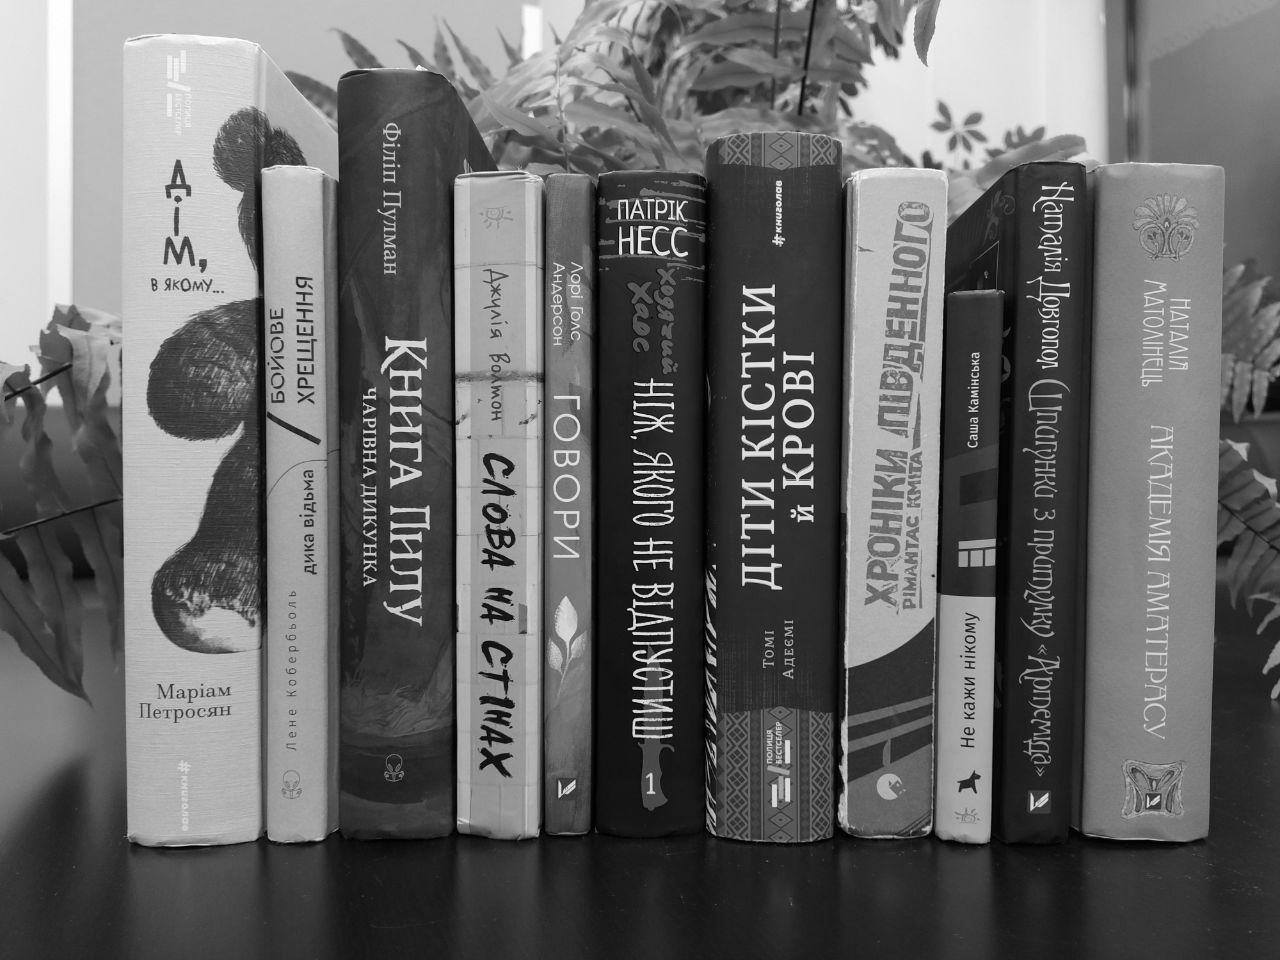

In [54]:
cv2_imshow(books)

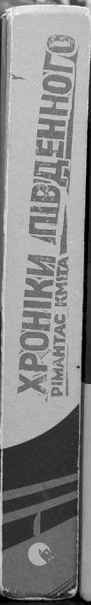

In [55]:
cv2_imshow(book)

In [56]:
keypoints1, descriptions1, keypoints2, descriptions2 = sift(books, book)

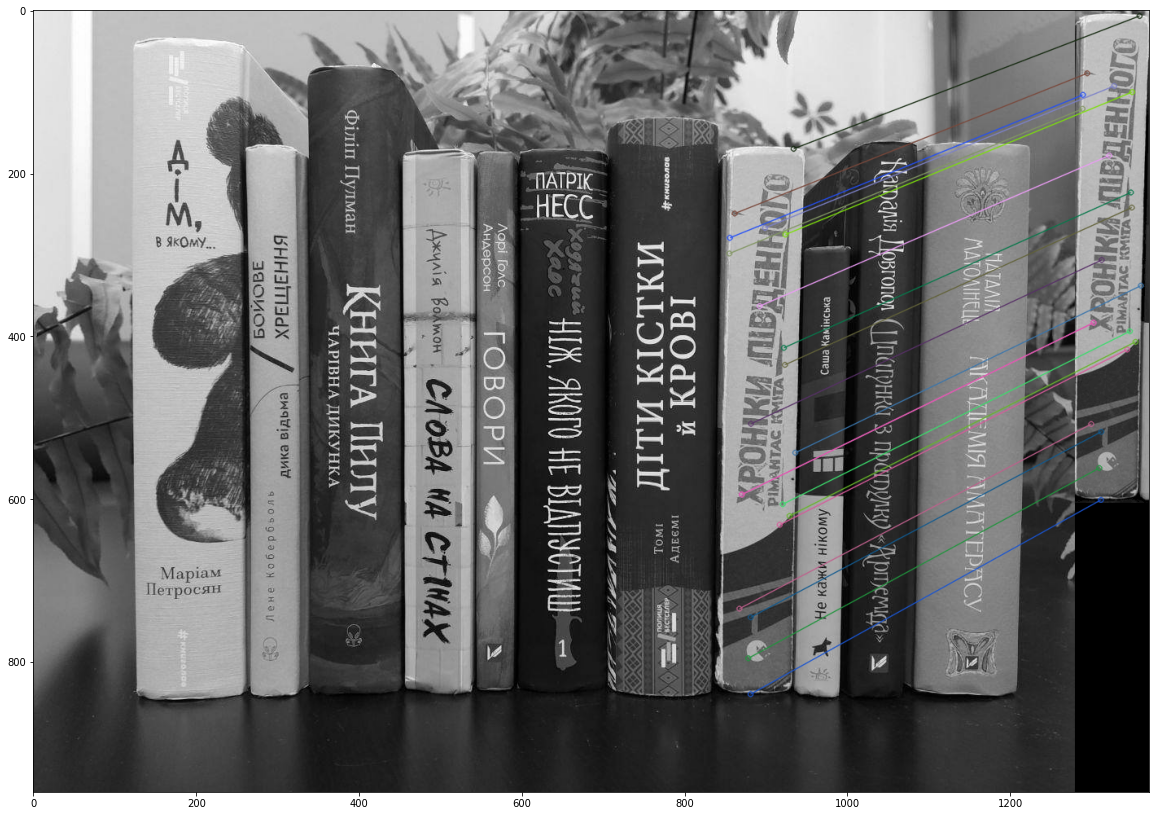

In [57]:
brute_force_matcher(keypoints1, descriptions1, keypoints2, descriptions2, books, book)

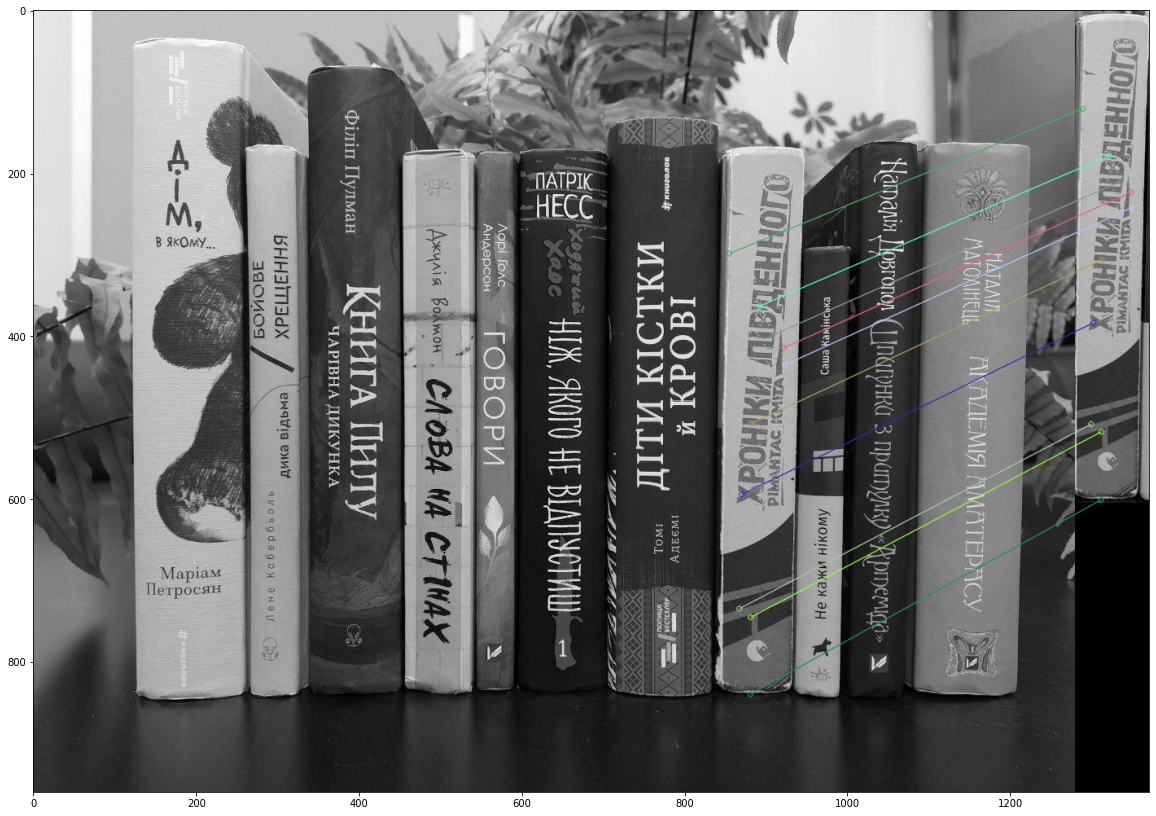

In [59]:
matcher(keypoints1, descriptions1, keypoints2, descriptions2, books, book)